### Installing the Required Libraries

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install numpy
!pip install seaborn
!pip install pyngrok
!pip install streamlit

### Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset...

In [ ]:
data = pd.read_csv('customer_data.csv')

### Encoding Categorical Features

In this cell, we apply label encoding to several categorical columns in the dataset to convert them into numerical values. The `LabelEncoder` from `sklearn.preprocessing` is used to perform this transformation.


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder(
)
c = ['Gender', "Ever_Married","Spending_Score","Var_1","Graduated"]
for column in c:
    data[column + '_Encoded'] = le.fit_transform(data[column])

### Feature Selection and Scaling

In this cell, we prepare the dataset for clustering by selecting relevant features and applying standardization.

In [ ]:
features = ['Gender_Encoded', 'Age', 'Spending_Score_Encoded']
data_clustering = data[features]
data_clustering = data_clustering.dropna()
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering)

### Determining Optimal Number of Clusters (Elbow Method)

In this cell, we apply the K-means clustering algorithm for a range of cluster values and calculate the inertia for each. This process helps us determine the optimal number of clusters using the Elbow Method.


In [ ]:
inertia = []
range_clusters = range(1,11)
for i in range_clusters:
  kmeans = KMeans(n_clusters=i,random_state=42)
  kmeans.fit(data_scaled)
  inertia.append(kmeans.inertia_)

### Visualizing the Elbow Method

In this cell, we plot the inertia values against the number of clusters to visualize the Elbow Method and determine the optimal number of clusters.


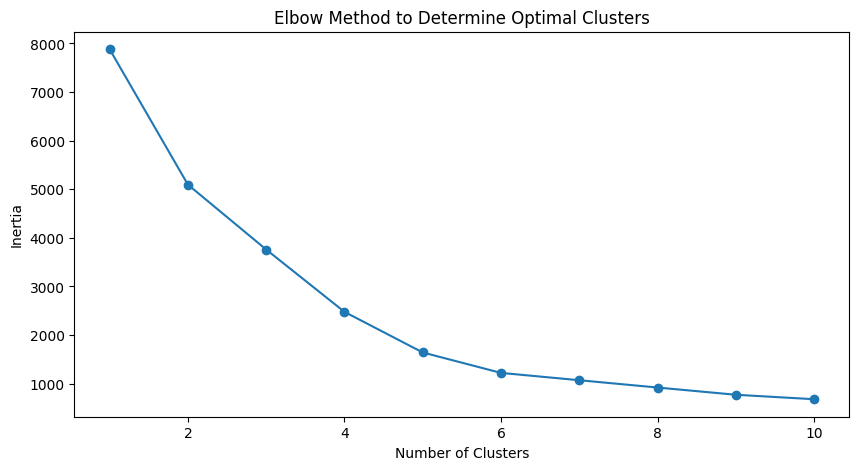

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range_clusters,inertia,marker="o")
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

### Applying K-Means Clustering and Saving the Results

In this cell, we apply the K-means clustering algorithm with the optimal number of clusters determined earlier, and save the clustered data into a new CSV file.


In [ ]:
optimal_clusters = 6
kmeans = KMeans(n_clusters=optimal_clusters,random_state=42)
data_clustering['Cluster'] = kmeans.fit_predict(data_scaled)
data['Cluster'] = data_clustering['Cluster']
data.to_csv('customer_data_with_clusters.csv', index=False)
print(data.head())


       ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  458989  Female          Yes   36       Yes    Engineer              0.0   
1  458994    Male          Yes   37       Yes  Healthcare              8.0   
2  458996  Female          Yes   69        No         NaN              0.0   
3  459000    Male          Yes   59        No   Executive             11.0   
4  459001  Female           No   19        No   Marketing              NaN   

  Spending_Score  Family_Size  Var_1  Gender_Encoded  Ever_Married_Encoded  \
0            Low          1.0  Cat_6               0                     1   
1        Average          4.0  Cat_6               1                     1   
2            Low          1.0  Cat_6               0                     1   
3           High          2.0  Cat_6               1                     1   
4            Low          4.0  Cat_6               0                     0   

   Spending_Score_Encoded  Var_1_Encoded  Graduated_Encoded  C

### Visualizing Customer Segments

In this cell, we create a scatter plot to visualize the customer segments based on the clustering results.


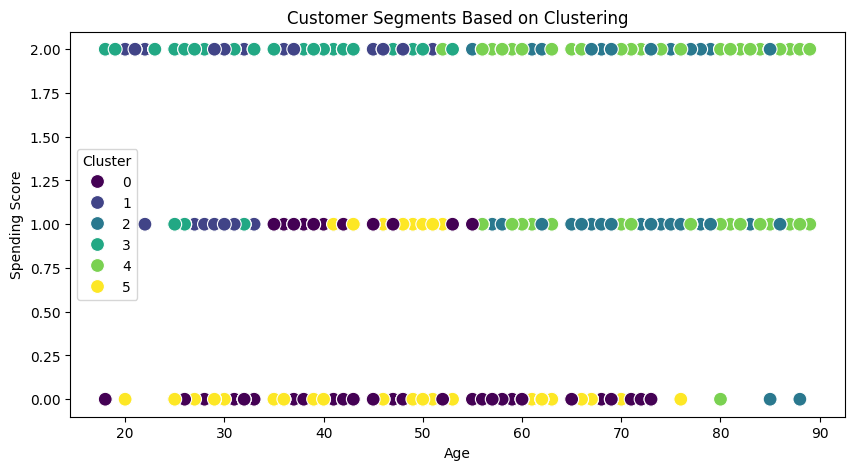

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(
    x=data_clustering['Age'],
    y=data_clustering['Spending_Score_Encoded'],
    hue=data_clustering['Cluster'],
    palette='viridis',
    s=100
)
plt.title("Customer Segments Based on Clustering")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.legend(title='Cluster')
plt.show()

### Summarizing Each Cluster

In this cell, we generate a summary of each cluster by calculating the mean of the numeric features for each cluster.


In [ ]:
# Summary of each cluster
# Select only numeric features for calculating the mean
numeric_features = data.select_dtypes(include=np.number).columns
cluster_summary = data[numeric_features].groupby('Cluster').mean()
print(cluster_summary)

                    ID        Age  Work_Experience  Family_Size  \
Cluster                                                           
0        463551.822870  46.434978         2.268473     3.228311   
1        463331.415584  31.734488         2.734921     3.081571   
2        462953.310881  72.041451         1.377246     2.048913   
3        463441.495690  33.843391         3.389857     2.696183   
4        463532.494737  69.056140         1.425101     2.052045   
5        463681.815287  47.216561         2.361011     3.117647   

         Gender_Encoded  Ever_Married_Encoded  Spending_Score_Encoded  \
Cluster                                                                 
0                   1.0              1.017937                0.210762   
1                   1.0              0.300144                1.979798   
2                   0.0              0.896373                1.466321   
3                   0.0              0.270115                1.977011   
4                   1.0  

### Streamlit Dashboard for Customer Segmentation

This cell sets up a Streamlit dashboard to interactively explore the customer segmentation results, allowing users to visualize the distribution of clusters and analyze specific features within each cluster.
This dashboard provides an interactive way to analyze customer segmentation results, making it easier for users to explore clusters, view statistics, and analyze the impact of specific features.


2025-01-05 14:21:10.672 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-05 14:21:11.159 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-01-05 14:21:11.171 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-05 14:21:11.175 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-05 14:21:11.179 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-05 14:21:11.183 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-05 14:21:11.185 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-05 14:21:11.386 Thread 'MainThread': mi

DeltaGenerator()

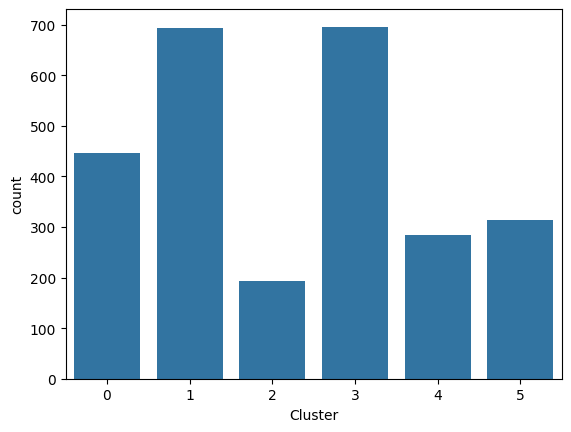

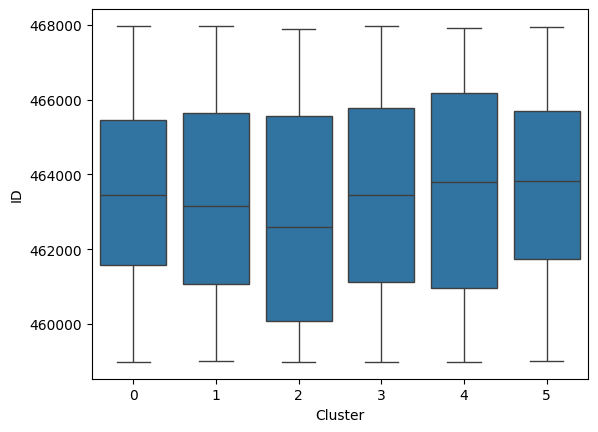

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
#data = pd.read_csv("customer_data.csv")
clusters = data['Cluster']  # Assuming cluster labels are already created

# Dashboard layout
st.title("Customer Segmentation Dashboard")
st.sidebar.header("Options")

# Cluster visualization
st.header("Cluster Distribution")
fig, ax = plt.subplots()
sns.countplot(x=clusters, ax=ax)
st.pyplot(fig)

# Customer insights
st.header("Cluster Details")
cluster_selected = st.selectbox("Select Cluster", sorted(data['Cluster'].unique()))
st.write(data[data['Cluster'] == cluster_selected].describe())

# Feature visualization
st.header("Feature Analysis")
feature = st.selectbox("Select Feature", data.columns)
fig, ax = plt.subplots()
sns.boxplot(x='Cluster', y=feature, data=data, ax=ax)
st.pyplot(fig)


### Evaluating Clustering Performance

In this cell, we calculate several clustering evaluation metrics to assess the quality of the clustering results.These metrics provide a quantitative way to evaluate and compare different clustering configurations, helping to validate the chosen number of clusters.


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Assuming `data_scaled` contains the standardized features
# and `data_clustering['Cluster']` contains cluster labels
silhouette_avg = silhouette_score(data_scaled, data_clustering['Cluster'])
davies_bouldin = davies_bouldin_score(data_scaled, data_clustering['Cluster'])
calinski_harabasz = calinski_harabasz_score(data_scaled, data_clustering['Cluster'])

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")


Silhouette Score: 0.5775567345340665
Davies-Bouldin Index: 0.6959558539236226
Calinski-Harabasz Index: 2863.1392987173826


### Streamlit Web App for Customer Segmentation Analysis

This cell creates a Streamlit web app (`app.py`) for visualizing and analyzing customer segmentation data. It allows the user to interactively explore the clustering results, examine cluster distributions, and analyze specific features for each cluster.
This app enables the user to visually explore customer segmentation data, interactively select clusters, and analyze key features within those clusters.



In [ ]:
%%writefile app.py


import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('customer_data_with_clusters.csv')  # Replace with your dataset
clusters = data['Cluster']  # Assuming cluster labels exist

# Dashboard layout
st.title("Customer Segmentation Dashboard")
st.sidebar.header("Options")

# Cluster visualization
st.header("Cluster Distribution")
fig, ax = plt.subplots()
sns.countplot(x=clusters, ax=ax)
st.pyplot(fig)

# Cluster-specific analysis
st.header("Cluster Details")
cluster_selected = st.selectbox("Select Cluster", sorted(data['Cluster'].unique()))
st.write(data[data['Cluster'] == cluster_selected].describe())

# Feature visualization
st.header("Feature Analysis")
feature = st.selectbox("Select Feature", ['Age', 'Gender', 'Spending_Score','Family_Size','Ever_Married'])
fig, ax = plt.subplots()
sns.boxplot(x='Cluster', y=feature, data=data, ax=ax)
st.pyplot(fig)



Writing app.py


### Exposing the Streamlit App via Ngrok

In this cell, we expose the locally running Streamlit app to the internet using Ngrok, allowing external access to the customer segmentation dashboard.
This setup allows you to share your locally running Streamlit app over the web, making it accessible to anyone with the provided URL.

In [ ]:
from pyngrok import ngrok

# Set your authtoken
ngrok.set_auth_token("******************") # Replace YOUR_AUTHTOKEN with your actual authtoken

!streamlit run app.py &>/dev/null&
# Use 'addr' instead of just 'port' to specify the local address and port
url = ngrok.connect(addr='8501')
print(f"Streamlit Dashboard is live at: {url}")

Streamlit Dashboard is live at: NgrokTunnel: "https://fc36-35-237-74-88.ngrok-free.app" -> "http://localhost:8501"


### Running the Streamlit App

In this cell, the Streamlit application is started using the following command:


In [ ]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://172.28.0.12:8502
  External URL: http://35.237.74.88:8502

